In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [9]:
dataset=pd.read_csv("time.csv")
dataset

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15,101,2,3,5,7,8,8,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36,138,2,1,2,2,4,4,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.25,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5,112.5,0,0,0,3,4,4,...,197,238,428,566,673,790,900,1030,1183,1306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,NaN,Dominica,15.415,/61.371,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
483,NaN,Grenada,12.1165,/61.679,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
484,NaN,Mozambique,/18.6657,35.5296,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
485,NaN,Syria,34.8021,38.9968,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
dataset.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '02-01-2020', '02-02-2020', '02-03-2020',
       '02-04-2020', '02-05-2020', '02-06-2020', '02-07-2020', '02-08-2020',
       '02-09-2020', '02-10-2020', '02-11-2020', '02-12-2020', '2/13/20',
       '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20',
       '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20',
       '2/26/20', '2/27/20', '2/28/20', '2/29/20', '03-01-2020', '03-02-2020',
       '03-03-2020', '03-04-2020', '03-05-2020', '03-06-2020', '03-07-2020',
       '03-08-2020', '03-09-2020', '03-10-2020', '03-11-2020', '03-12-2020',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20'],
      dtype='object')

In [11]:
for i in range(4,66):
 print(dataset[dataset.columns[i]].value_counts())

0      458
1       12
2        6
4        3
5        2
444      1
26       1
14       1
10       1
9        1
6        1
Name: 1/22/20, dtype: int64
0      450
1        9
2        7
5        5
3        4
9        3
444      1
32       1
27       1
22       1
16       1
8        1
7        1
6        1
4        1
Name: 1/23/20, dtype: int64
0      447
2       10
1        4
3        4
5        3
15       3
9        2
8        2
4        2
23       1
20       1
18       1
43       1
10       1
24       1
27       1
36       1
549      1
53       1
Name: 1/24/20, dtype: int64
0      444
3        6
1        4
2        4
4        3
18       3
7        2
15       1
5        1
6        1
8        1
9        1
10       1
11       1
761      1
78       1
19       1
23       1
27       1
28       1
32       1
33       1
39       1
41       1
43       1
57       1
62       1
17       1
Name: 1/25/20, dtype: int64
0       438
1         9
4         7
3         3
36        2
5         2
7         2
8

IndexError: index 65 is out of bounds for axis 0 with size 65

In [12]:
dataset1=dataset.drop(['1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '02-01-2020', '02-02-2020', '02-03-2020',
       '02-04-2020', '02-05-2020', '02-06-2020', '02-07-2020', '02-08-2020',
       '02-09-2020', '02-10-2020', '02-11-2020', '02-12-2020', '2/13/20',
       '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20',
       '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20',
       '2/26/20', '2/27/20', '2/28/20', '2/29/20', '03-01-2020', '03-02-2020',
       '03-03-2020'],axis=1)
dataset.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '02-01-2020', '02-02-2020', '02-03-2020',
       '02-04-2020', '02-05-2020', '02-06-2020', '02-07-2020', '02-08-2020',
       '02-09-2020', '02-10-2020', '02-11-2020', '02-12-2020', '2/13/20',
       '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20',
       '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20',
       '2/26/20', '2/27/20', '2/28/20', '2/29/20', '03-01-2020', '03-02-2020',
       '03-03-2020', '03-04-2020', '03-05-2020', '03-06-2020', '03-07-2020',
       '03-08-2020', '03-09-2020', '03-10-2020', '03-11-2020', '03-12-2020',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20'],
      dtype='object')

In [13]:
dataset1

,Province/State,Country/Region,Lat,Long,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15,101,43,47,48,50,50,50,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36,138,331,360,420,461,502,511,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,110,117,130,138,150,150,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.25,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5,112.5,50,50,83,93,99,117,...,197,238,428,566,673,790,900,1030,1183,1306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,NaN,Dominica,15.415,/61.371,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
483,NaN,Grenada,12.1165,/61.679,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
484,NaN,Mozambique,/18.6657,35.5296,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
485,NaN,Syria,34.8021,38.9968,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


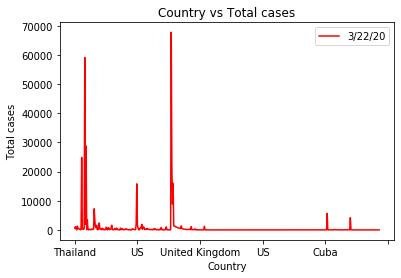

In [14]:
dataset1.plot(x="Country/Region",y="3/22/20",color="red")
plt.title("Country vs Total cases")
plt.xlabel("Country")
plt.ylabel("Total cases")
plt.show()
   

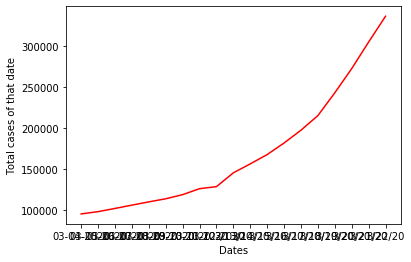

In [9]:
list1=[95120,97882,101784,105821,109795,113561,118592,125865,128343,145193,156094,167446,181527,197142,214910,242708,272166,304524,335955]  
list2=['03-04-2020', '03-05-2020', '03-06-2020', '03-07-2020',
       '03-08-2020', '03-09-2020', '03-10-2020', '03-11-2020', '03-12-2020',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20']
plt.plot(list2,list1,color='red')
plt.xlabel("Dates")
plt.ylabel("Total cases of that date")
plt.show()

In [15]:
countries=["Asia","Africa","Europe","North America","South America","Oceania"]


In [16]:
dataset1["Continent"]=""
dataset1

,Province/State,Country/Region,Lat,Long,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,Continent
0,NaN,Thailand,15,101,43,47,48,50,50,50,...,82,114,147,177,212,272,322,411,599,
1,NaN,Japan,36,138,331,360,420,461,502,511,...,773,839,825,878,889,924,963,1007,1086,
2,NaN,Singapore,1.2833,103.8333,110,117,130,138,150,150,...,212,226,243,266,313,345,385,432,455,
3,NaN,Nepal,28.1667,84.25,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,2,
4,NaN,Malaysia,2.5,112.5,50,50,83,93,99,117,...,238,428,566,673,790,900,1030,1183,1306,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,NaN,Dominica,15.415,/61.371,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,
483,NaN,Grenada,12.1165,/61.679,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,
484,NaN,Mozambique,/18.6657,35.5296,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,
485,NaN,Syria,34.8021,38.9968,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,


In [29]:
dataset2=pd.read_csv("c2c.csv")
dataset2

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
189,South America,Paraguay
190,South America,Peru
191,South America,Suriname
192,South America,Uruguay


In [30]:
for i in range(0,487):
    dataset1.loc[i].Continent=dataset2[dataset2.Country==dataset1.loc[i].Country/Region].Continent

AttributeError: 'Series' object has no attribute 'Country'

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
189,South America,Paraguay
190,South America,Peru
191,South America,Suriname
192,South America,Uruguay
